In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from autoencoder import Autoencoder

In [2]:
def plot_comparison(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_shape = x_train.shape[1:]

print (x_train.shape)
print (x_test.shape)

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [4]:
input_dim = x_train.shape[1]

Without hidden layers (mse + relu)

In [5]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = []
decoder_layers = []

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='mse',
                        activation='relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 2s 3ms/step - loss: 0.1089 - val_loss: 0.0719
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0702 - val_loss: 0.0684
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0654 - val_loss: 0.0630
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0622 - val_loss: 0.0614
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0610 - val_loss: 0.0606
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0603 - val_loss: 0.0599
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0597 - val_loss: 0.0594
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0592 - val_loss: 0.0589
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0588 - val_loss: 0.0586
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0585 - val_loss: 0.0583

Visualization

313/313 [==============================] - 0s 768us/step


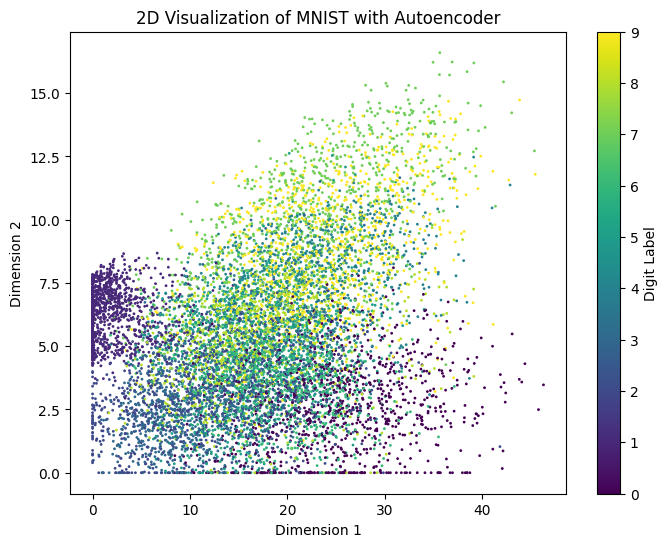

In [6]:
autoencoder.visualize_2d(x_test, y_test, False)

Compression and decompression

In [7]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 756us/step


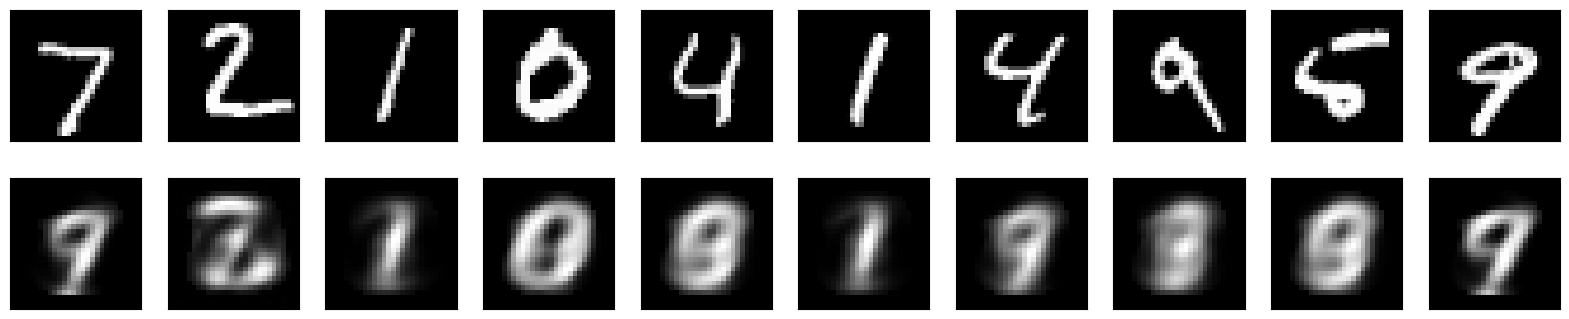

In [8]:
plot_comparison(x_test, decoded_data)

Image generation

1/1 [==============================] - 0s 13ms/step


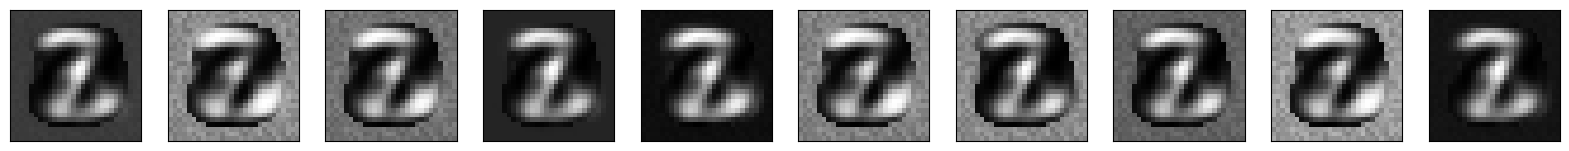

In [9]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With hidden layers (mse + relu)

In [11]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [64, 128]
decoder_layers = [128, 64]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='mse',
                        activation='relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0819 - val_loss: 0.0654
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0640 - val_loss: 0.0631
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0622 - val_loss: 0.0617
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0610 - val_loss: 0.0605
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0603 - val_loss: 0.0602
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0600 - val_loss: 0.0600
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0600 - val_loss: 0.0598
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0599 - val_loss: 0.0598
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0596 - val_loss: 0.0591
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0534 - val_loss: 0.0503

313/313 [==============================] - 0s 908us/step


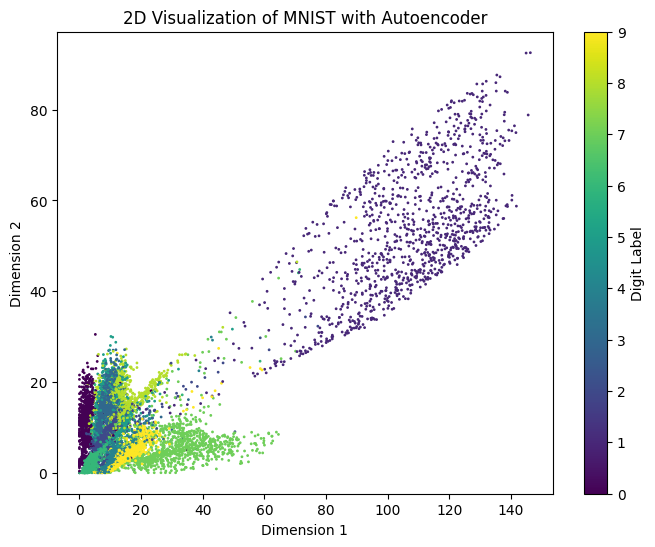

In [12]:
autoencoder.visualize_2d(x_test, y_test, False)

In [13]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 897us/step


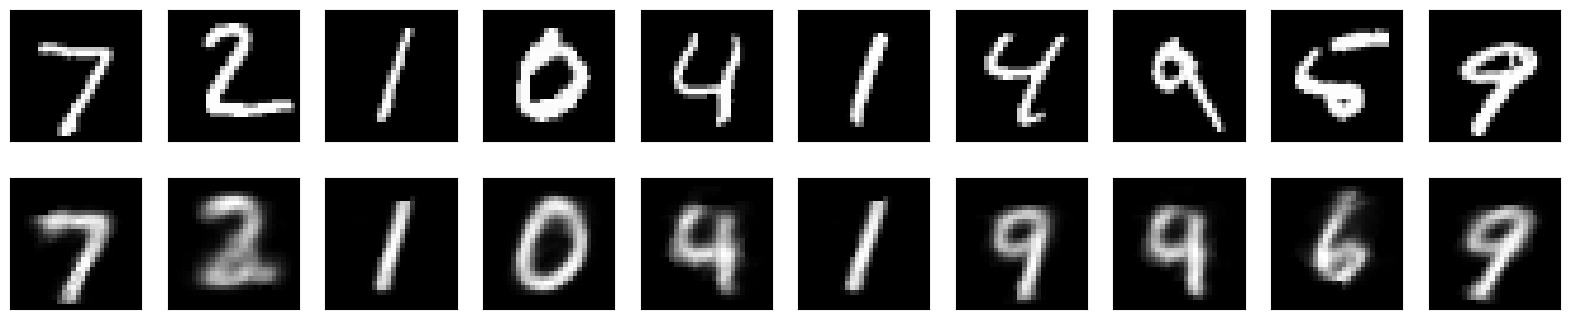

In [14]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 22ms/step


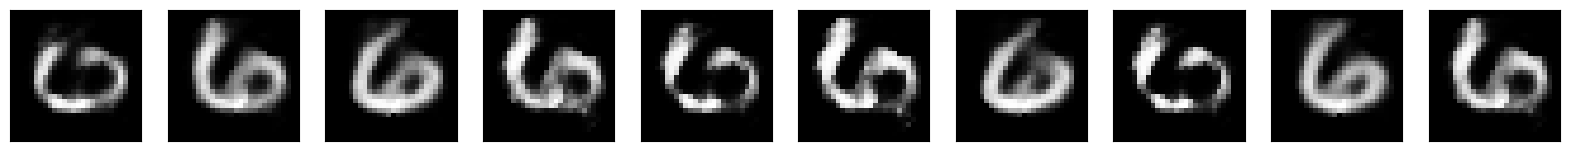

In [15]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Without hidden layers (binary_crossentropy + relu)

In [16]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [64, 128]
decoder_layers = [128, 64]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='binary_crossentropy',
                        activation='relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2980 - val_loss: 0.2395
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2305 - val_loss: 0.2236
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2171 - val_loss: 0.2123
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2096 - val_loss: 0.2061
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2038 - val_loss: 0.2020
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2003 - val_loss: 0.1990
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1977 - val_loss: 0.1962
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1954 - val_loss: 0.1942
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1935 - val_loss: 0.1926
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1921 - val_loss: 0.1914

313/313 [==============================] - 0s 952us/step


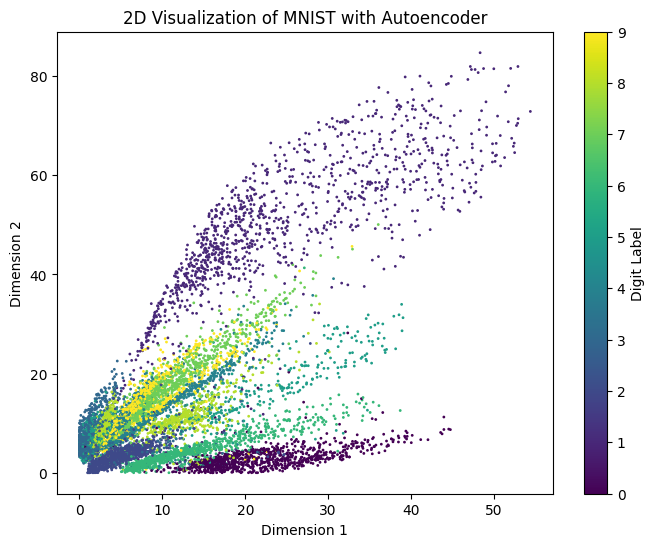

In [17]:
autoencoder.visualize_2d(x_test, y_test, False)

In [18]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 873us/step


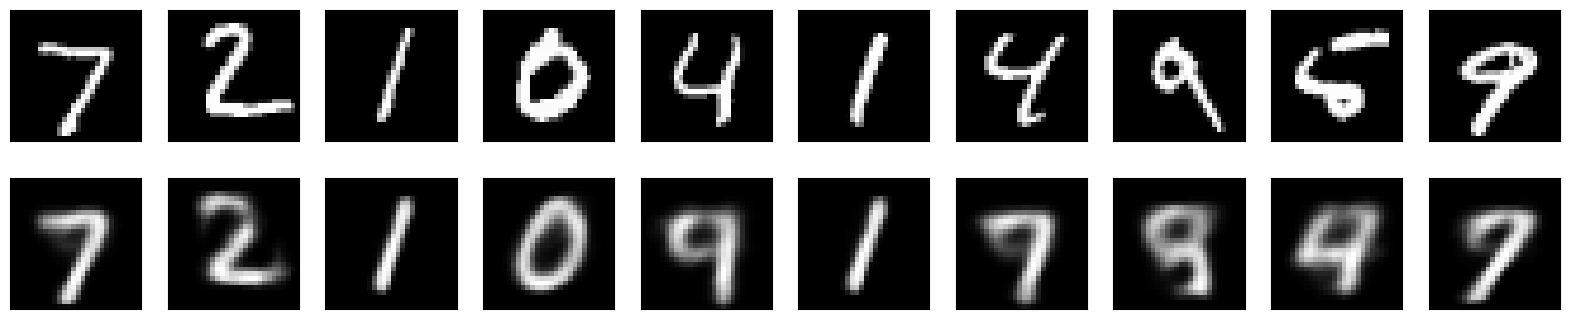

In [19]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 12ms/step


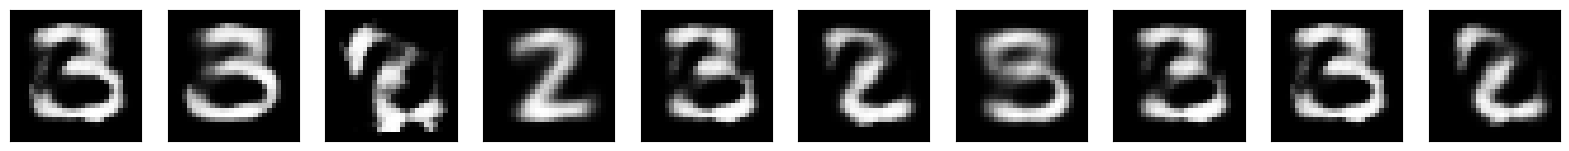

In [20]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With hidden layers (mse + leaky_relu)

In [26]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [64, 128]
decoder_layers = [128, 64]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='mse',
                        activation='leaky_relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0766 - val_loss: 0.0590
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0571 - val_loss: 0.0549
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0537 - val_loss: 0.0525
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0519 - val_loss: 0.0509
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0503 - val_loss: 0.0490
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0484 - val_loss: 0.0475
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0471 - val_loss: 0.0463
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0459 - val_loss: 0.0454
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0451 - val_loss: 0.0447
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0445 - val_loss: 0.0442

313/313 [==============================] - 0s 1ms/step


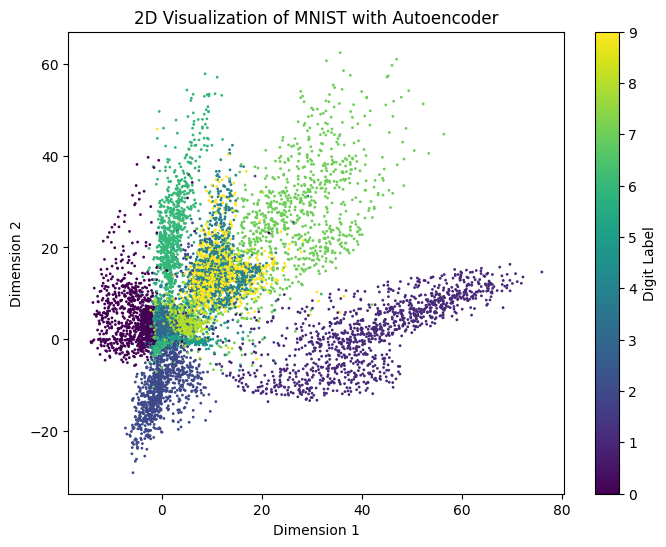

In [27]:
autoencoder.visualize_2d(x_test, y_test, False)

In [28]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 829us/step


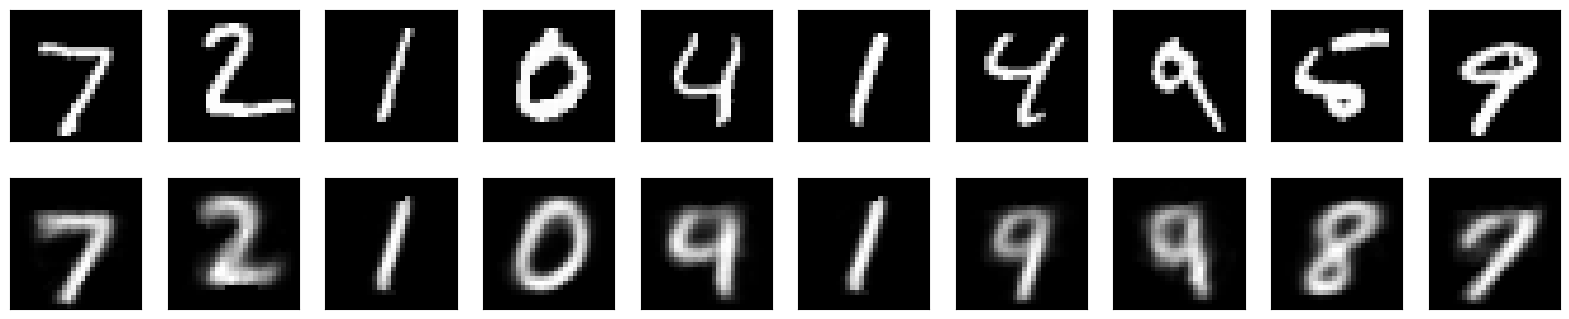

In [29]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 26ms/step


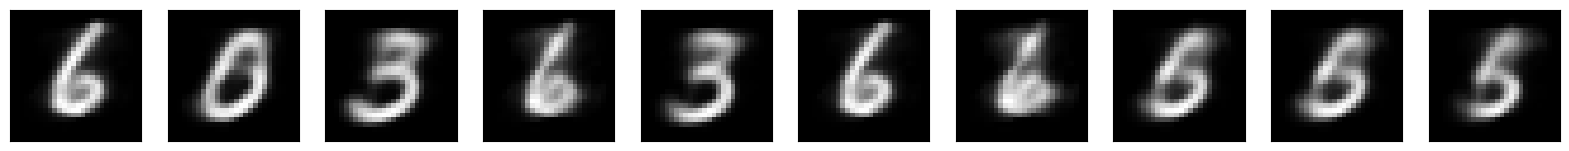

In [30]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With hidden layers (binary_crossentropy + leaky_relu)

In [31]:
encoding_dim = 2
epochs = 100
batch_size = 256

encoder_layers = [64, 128]
decoder_layers = [128, 64]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='binary_crossentropy',
                        activation='leaky_relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2893 - val_loss: 0.2392
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2314 - val_loss: 0.2228
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2192 - val_loss: 0.2144
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2123 - val_loss: 0.2098
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2084 - val_loss: 0.2073
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2059 - val_loss: 0.2052
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2039 - val_loss: 0.2035
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2021 - val_loss: 0.2014
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2002 - val_loss: 0.1997
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1983 - val_lo

313/313 [==============================] - 0s 919us/step


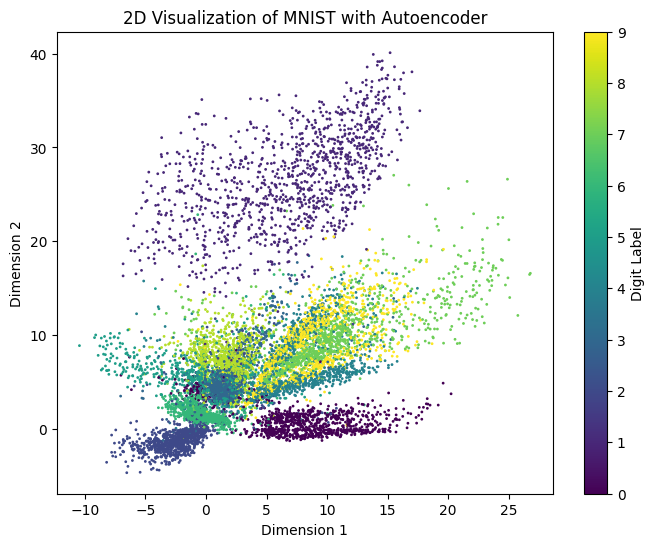

In [32]:
autoencoder.visualize_2d(x_test, y_test, False)

In [33]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 878us/step


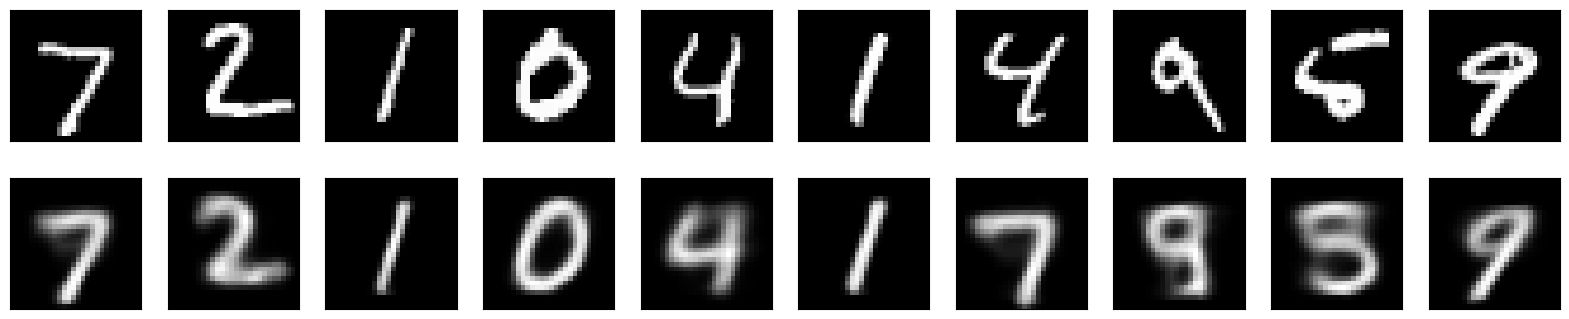

In [34]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 22ms/step


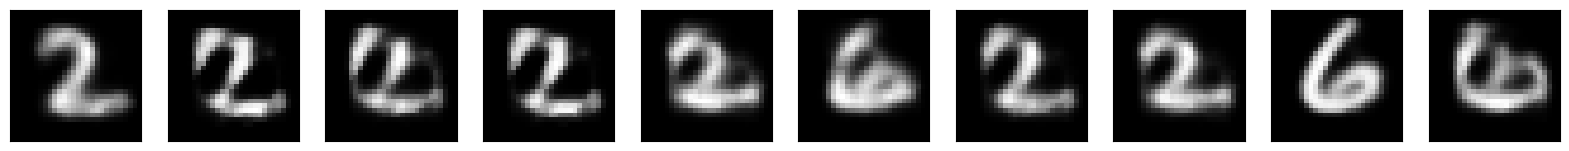

In [35]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()